# <p style="color:green;"> Exercise on Netflix_titles </p>

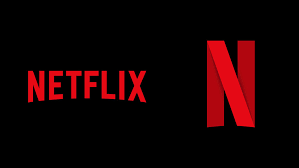

## <p style="color:red;"> July 2022 </p>
### <p style="color:blue;">Book: Python pour la Data Science - Analysez vos données par la pratique avec NumPy, Pandas, Matplotlib et Seaborn (by Amandine VELT)</p>

This notebook is dealing with a specific dataset: **Netflix_titles.csv**.
It contains the most current and important operations using *Numpy, Pandas, Matplotlib and Seaborn*.

The different points analysed are:
* 1: dataset import and overview (name is data) 
* 2: dataset size
* 3: Movies and TV Show count
* 4: Statistical results summary
* 5: NaN values analysis
* 6: Missing values exploration
* 7: Delete duplicate rows
* 8: Count Movie & TV Show produced in US and France
* 9: The older content available in Netflix
* 10: The longer movie in Netflix
* 11: Category with highest content
* 12: Directors with highest number of movies
* 13: Jan Suter and his actors
* 14: Top ten countries
* 15: Number of films per ratings
* 16: Evolution of number of movies / TV show along the time
* 17: Movies duration distribution
* 18: Series seasons number




In [1]:
# Python packages import
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# 1 # Data import & overview
data = pd.read_csv("netflix_titles.csv", index_col = 0)
data.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...


In [3]:
# 2 # DataFrame size
print("The number of rows is:", data.shape[0])
print("The number of columns is:", data.shape[1])

The number of rows is: 6234
The number of columns is: 11


In [4]:
data.set_index('title')['type']

title
Norm of the North: King Sized Adventure          Movie
Jandino: Whatever it Takes                       Movie
Transformers Prime                             TV Show
Transformers: Robots in Disguise               TV Show
#realityhigh                                     Movie
                                                ...   
Red vs. Blue                                   TV Show
Maron                                          TV Show
Little Baby Bum: Nursery Rhyme Friends           Movie
A Young Doctor's Notebook and Other Stories    TV Show
Friends                                        TV Show
Name: type, Length: 6234, dtype: object

In [7]:
# 3 # Movies and TV Show count
data_Movie = data.loc[data['type'] == 'Movie']
data_TVShow = data.loc[data['type'] == 'TV Show']
# print results using loc method
print("The number of Movie in Netflix dataset is", len(data_Movie))
print("The number of TV Show in Netflix dataset is", len(data_TVShow))

The number of Movie in Netflix dataset is 4265
The number of TV Show in Netflix dataset is 1969


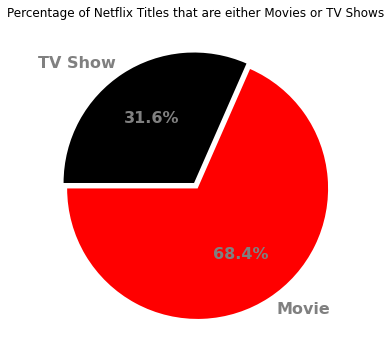

In [18]:
plt.figure(figsize=(12,6))
plt.title('Percentage of Netflix Titles that are either Movies or TV Shows')
plt.pie(data.type.value_counts(),
        explode = (0.025,0.025), 
        labels = data.type.value_counts().index, 
        colors = ['red','black'], 
        autopct='%1.1f%%', 
        startangle=180, 
        textprops = {'color': 'Grey','weight':'bold','fontsize':16})
plt.show()

In [19]:
# print results using value_counts method
data['type'].value_counts()

Movie      4265
TV Show    1969
Name: type, dtype: int64

In [20]:
# 4 # Statistical results summary
data.describe()

,release_year
count,6234.00000
mean,2013.35932
std,8.81162
min,1925.00000
25%,2013.00000
50%,2016.00000
75%,2018.00000
max,2020.00000


In [21]:
data.describe(include='all')

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,6234,6234,4265,5664,5758,6223,6234.00000,6224,6234,6234,6234
unique,2,6172,3301,5469,554,1524,NaN,14,201,461,6226
top,Movie,The Silence,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,A surly septuagenarian gets another chance at ...
freq,4265,3,18,18,2032,122,NaN,2027,1321,299,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,2013.35932,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,8.81162,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1925.00000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2013.00000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2016.00000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2018.00000,NaN,NaN,NaN,NaN


In [22]:
# 5 # NaN values
data.set_index('title').isna()

,type,director,cast,country,date_added,release_year,rating,duration,listed_in,description
title,,,,,,,,,,
Norm of the North: King Sized Adventure,False,False,False,False,False,False,False,False,False,False
Jandino: Whatever it Takes,False,True,False,False,False,False,False,False,False,False
Transformers Prime,False,True,False,False,False,False,False,False,False,False
Transformers: Robots in Disguise,False,True,False,False,False,False,False,False,False,False
#realityhigh,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
Red vs. Blue,False,True,False,False,True,False,False,False,False,False
Maron,False,True,False,False,True,False,False,False,False,False
Little Baby Bum: Nursery Rhyme Friends,False,True,True,True,True,False,True,False,False,False


In [23]:
data.isna().sum()

type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [24]:
# 6 # Missing values exploration
data_NaN_director = data.loc[data['director'].isna()].set_index('title')
data_NaN_director

,type,director,cast,country,date_added,release_year,rating,duration,listed_in,description
title,,,,,,,,,,
Jandino: Whatever it Takes,Movie,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
Transformers Prime,TV Show,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
Transformers: Robots in Disguise,TV Show,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
Apaches,TV Show,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
Fire Chasers,TV Show,NaN,NaN,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
...,...,...,...,...,...,...,...,...,...,...
Red vs. Blue,TV Show,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
Maron,TV Show,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
Little Baby Bum: Nursery Rhyme Friends,Movie,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...


In [25]:
# print results using value_counts method
data_NaN_director['type'].value_counts()

TV Show    1841
Movie       128
Name: type, dtype: int64

In [26]:
data_NaN_cast = data.loc[data['cast'].isna()]
data_NaN_cast.set_index('title')

,type,director,cast,country,date_added,release_year,rating,duration,listed_in,description
title,,,,,,,,,,
Fire Chasers,TV Show,NaN,NaN,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
Rolling Papers,Movie,Mitch Dickman,NaN,"United States, Uruguay","September 8, 2017",2015,TV-MA,79 min,Documentaries,"As the newspaper industry takes a hit, The Den..."
City of Joy,Movie,Madeleine Gavin,NaN,"United States,","September 7, 2018",2018,TV-MA,77 min,Documentaries,Women who've been sexually brutalized in war-t...
First and Last,TV Show,NaN,NaN,NaN,"September 7, 2018",2018,TV-MA,1 Season,Docuseries,Take an intimate look at the emotionally charg...
Christiane Amanpour: Sex & Love Around the World,TV Show,NaN,NaN,United States,"September 30, 2018",2018,TV-MA,1 Season,Docuseries,"A contextual, acculturated dive into how adult..."
...,...,...,...,...,...,...,...,...,...,...
Pororo - The Little Penguin,TV Show,NaN,NaN,South Korea,"April 19, 2019",2013,TV-Y,2 Seasons,"Kids' TV, Korean TV Shows","On a tiny island, Pororo the penguin has fun a..."
Murderous Affairs,TV Show,NaN,NaN,United States,"April 17, 2018",2017,TV-14,3 Seasons,"Crime TV Shows, Docuseries","Mixing interviews with dramatic re-enactments,..."
The Minimighty Kids,TV Show,NaN,NaN,France,"April 15, 2018",2012,TV-G,2 Seasons,"Kids' TV, TV Comedies","Some have big feet or a sniffly nose, others a..."


In [27]:
data_NaN_cast.loc[:,'listed_in'].value_counts().head(10)

Documentaries                                         148
Documentaries, International Movies                    94
Docuseries                                             31
Documentaries, Sports Movies                           20
Crime TV Shows, Docuseries                             19
Documentaries, Music & Musicals                        15
Documentaries, International Movies, Sports Movies     14
Kids' TV                                               14
Docuseries, International TV Shows                     14
Crime TV Shows, Docuseries, International TV Shows     12
Name: listed_in, dtype: int64

In [28]:
# 7 # Delete duplicate rows
print("The number of duplicated rows is:", data.duplicated().sum())
print("The row id of duplicated row is:", data[data.duplicated() == True].index)

The number of duplicated rows is: 1
The row id of duplicated row is: Int64Index([81072516], dtype='int64', name='show_id')


In [29]:
data[data.duplicated() == True]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
81072516,Movie,Sarkar,A.R. Murugadoss,"Vijay, Varalakshmi Sarathkumar, Keerthi Suresh...",India,"March 2, 2019",2018,TV-MA,162 min,"Action & Adventure, Dramas, International Movies",A ruthless businessman’s mission to expose ele...


In [30]:
data_wo_duplicates = data.drop_duplicates()
data_wo_duplicates.set_index('title')

,type,director,cast,country,date_added,release_year,rating,duration,listed_in,description
title,,,,,,,,,,
Norm of the North: King Sized Adventure,Movie,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
Jandino: Whatever it Takes,Movie,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
Transformers Prime,TV Show,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
Transformers: Robots in Disguise,TV Show,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
#realityhigh,Movie,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...
Red vs. Blue,TV Show,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
Maron,TV Show,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
Little Baby Bum: Nursery Rhyme Friends,Movie,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...


In [31]:
# 8 # Count Movie & TV Show produced in US and France
print("There are", data_Movie[(data_Movie["country"] == "United States")].shape[0], "movies produced in United States.")
print("There are", data_TVShow[(data_TVShow["country"] == "United States")].shape[0], "TV Shows produced in United States.")

There are 1482 movies produced in United States.
There are 550 TV Shows produced in United States.


In [32]:
print("There are", data_Movie[(data_Movie["country"] == "France")].shape[0], "movies produced in France.")
print("There are", data_TVShow[(data_TVShow["country"] == "France")].shape[0], "TV Shows produced in France.")

There are 50 movies produced in France.
There are 40 TV Shows produced in France.


In [33]:
# 9 # The older content available in Netflix
print("The oldest content available in Netflix has been produced in year:", data.loc[:,'release_year'].min())

The oldest content available in Netflix has been produced in year: 1925


In [34]:
data[data['release_year'] == data.loc[:,'release_year'].min()].set_index('title')

,type,director,cast,country,date_added,release_year,rating,duration,listed_in,description
title,,,,,,,,,,
Pioneers: First Women Filmmakers*,TV Show,NaN,NaN,NaN,"December 30, 2018",1925,TV-PG,1 Season,TV Shows,This collection restores films from women who ...


In [35]:
# 10 # The longer movie in Netflix
data.set_index('title').loc[:,'duration']

title
Norm of the North: King Sized Adventure            90 min
Jandino: Whatever it Takes                         94 min
Transformers Prime                               1 Season
Transformers: Robots in Disguise                 1 Season
#realityhigh                                       99 min
                                                  ...    
Red vs. Blue                                   13 Seasons
Maron                                           4 Seasons
Little Baby Bum: Nursery Rhyme Friends             60 min
A Young Doctor's Notebook and Other Stories     2 Seasons
Friends                                        10 Seasons
Name: duration, Length: 6234, dtype: object

In [36]:
data_Movie['Durée'] = data_Movie['duration']
data_Movie.set_index('title')

C:\Users\phili\AppData\Local\Temp/ipykernel_23448/1543076069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_Movie['Durée'] = data_Movie['duration']


,type,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Durée
title,,,,,,,,,,,
Norm of the North: King Sized Adventure,Movie,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,90 min
Jandino: Whatever it Takes,Movie,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,94 min
#realityhigh,Movie,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,99 min
Automata,Movie,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f...",110 min
Fabrizio Copano: Solo pienso en mi,Movie,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...,60 min
...,...,...,...,...,...,...,...,...,...,...,...
Frank and Cindy,Movie,G.J. Echternkamp,NaN,United States,"April 1, 2016",2007,TV-MA,70 min,Documentaries,Frank was a rising pop star when he married Ci...,70 min
Frank and Cindy,Movie,G.J. Echternkamp,"Rene Russo, Oliver Platt, Johnny Simmons, Jane...",United States,"April 1, 2016",2015,R,102 min,"Comedies, Dramas, Independent Movies",A student filmmaker vengefully turns his camer...,102 min
Iverson,Movie,Zatella Beatty,Allen Iverson,United States,"April 1, 2016",2014,NR,88 min,"Documentaries, Sports Movies",This unfiltered documentary follows the rocky ...,88 min


In [37]:
data_Movie['Durée'].str.replace(" min","").astype(int).sort_values(ascending=False).index

Int64Index([80988062, 60002818, 60020906, 70090035, 80175798, 81035749,
            70123118, 60004484,   449931, 70274390,
            ...
            80235766, 60027942, 81110498, 80149064, 81211714, 80239831,
            80114804, 81020543, 81176188, 70304298],
           dtype='int64', name='show_id', length=4265)

In [38]:
data_Movie[data_Movie.index == 80988062]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Durée
show_id,,,,,,,,,,,,
80988062,Movie,Black Mirror: Bandersnatch,NaN,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,"December 28, 2018",2018,TV-MA,312 min,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question...",312 min


In [39]:
# 11 # Category with highest content
data_listed_in = data.set_index('title')['listed_in']
data_listed_in

title
Norm of the North: King Sized Adventure                       Children & Family Movies, Comedies
Jandino: Whatever it Takes                                                       Stand-Up Comedy
Transformers Prime                                                                      Kids' TV
Transformers: Robots in Disguise                                                        Kids' TV
#realityhigh                                                                            Comedies
                                                                     ...                        
Red vs. Blue                                   TV Action & Adventure, TV Comedies, TV Sci-Fi ...
Maron                                                                                TV Comedies
Little Baby Bum: Nursery Rhyme Friends                                                    Movies
A Young Doctor's Notebook and Other Stories             British TV Shows, TV Comedies, TV Dramas
Friends                 

In [40]:
", ".join(data_wo_duplicates["listed_in"].dropna()).split(", ") 

['Children & Family Movies',
 'Comedies',
 'Stand-Up Comedy',
 "Kids' TV",
 "Kids' TV",
 'Comedies',
 'Crime TV Shows',
 'International TV Shows',
 'Spanish-Language TV Shows',
 'International Movies',
 'Sci-Fi & Fantasy',
 'Thrillers',
 'Stand-Up Comedy',
 'Docuseries',
 'Science & Nature TV',
 'Action & Adventure',
 'Thrillers',
 'Stand-Up Comedy',
 'Action & Adventure',
 'Dramas',
 'International Movies',
 'Children & Family Movies',
 'Children & Family Movies',
 'Children & Family Movies',
 'Children & Family Movies',
 'Children & Family Movies',
 'Children & Family Movies',
 'Children & Family Movies',
 'Cult Movies',
 'Dramas',
 'Independent Movies',
 'Comedies',
 'Independent Movies',
 'Romantic Movies',
 'Action & Adventure',
 'Comedies',
 'International Movies',
 'Documentaries',
 'Horror Movies',
 'Thrillers',
 'Dramas',
 'Independent Movies',
 'Dramas',
 'Independent Movies',
 'Romantic Movies',
 'International TV Shows',
 'Romantic TV Shows',
 'TV Comedies',
 'Documentaries

In [41]:
categories = pd.Series(", ".join(data_wo_duplicates["listed_in"].dropna()).split(", "))
#
categories.value_counts().head() 

International Movies      1926
Dramas                    1622
Comedies                  1113
International TV Shows    1001
Documentaries              668
dtype: int64

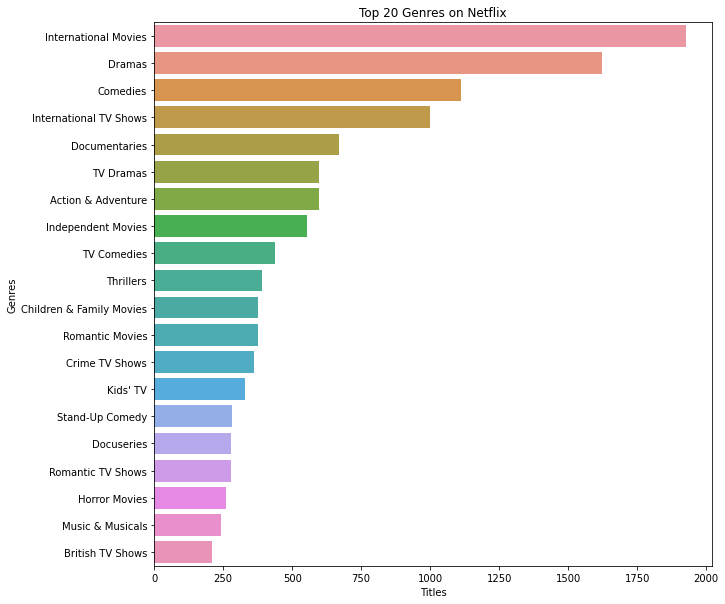

In [42]:
plt.figure(figsize=(10,10))
g = sns.countplot(y = categories, order=categories.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

In [43]:
# 12 # Directors with highest number of movies
data_director = data.set_index('title')['director']
data_director

title
Norm of the North: King Sized Adventure        Richard Finn, Tim Maltby
Jandino: Whatever it Takes                                          NaN
Transformers Prime                                                  NaN
Transformers: Robots in Disguise                                    NaN
#realityhigh                                           Fernando Lebrija
                                                         ...           
Red vs. Blue                                                        NaN
Maron                                                               NaN
Little Baby Bum: Nursery Rhyme Friends                              NaN
A Young Doctor's Notebook and Other Stories                         NaN
Friends                                                             NaN
Name: director, Length: 6234, dtype: object

In [44]:
", ".join(data_wo_duplicates["director"].dropna()).split(", ") 

['Richard Finn',
 'Tim Maltby',
 'Fernando Lebrija',
 'Gabe Ibáñez',
 'Rodrigo Toro',
 'Francisco Schultz',
 'Henrik Ruben Genz',
 'José Miguel Contreras',
 'Daniel Alfredson',
 'Munjal Shroff',
 'Tilak Shetty',
 'Munjal Shroff',
 'Tilak Shetty',
 'Tilak Shetty',
 'Tilak Shetty',
 'Munjal Shroff',
 'Tilak Shetty',
 'Gaspar Noé',
 "Tom O'Brien",
 'Antoine Bardou-Jacquet',
 'Mitch Dickman',
 'Brad Anderson',
 'Austin Stark',
 'Hannah Fidell',
 'Madeleine Gavin',
 'Sopon Sukdapisit',
 'Kevin R. Adams',
 'Joe Ksander',
 'Ian Samuels',
 'Franck Ribière',
 'Daniele Thompson',
 'Anubhav Sinha',
 'Maha Venkatesh',
 'Tharun Bhascker',
 'Şenol Sönmez',
 'Tom Gianas',
 'Ross R. Shuman',
 'Rajkumar Hirani',
 'Robert Osman',
 'Nathanael Wiseman',
 'Jon Spira',
 'Mez Tharatorn',
 'Adisorn Tresirikasem',
 'Mez Tharatorn',
 'Banjong Pisanthanakun',
 'Banjong Pisanthanakun',
 'Paween Purikitpanya',
 'Songyos Sugmakanan',
 'Parkpoom Wongpoom',
 'Visute Poolvoralaks',
 'Banjong Pisanthanakun',
 'Parkpoom

In [45]:
directors = pd.Series(", ".join(data_wo_duplicates["director"].dropna()).split(", "))
#
directors.value_counts().head(20) 

Jan Suter              21
Raúl Campos            19
Jay Karas              14
Marcus Raboy           14
Jay Chapman            12
Martin Scorsese         9
Steven Spielberg        9
Shannon Hartman         8
Umesh Mehra             8
Johnnie To              8
Lance Bangs             8
David Dhawan            8
Robert Rodriguez        7
Yılmaz Erdoğan          7
Quentin Tarantino       7
Noah Baumbach           7
Ryan Polito             7
Cathy Garcia-Molina     7
Hakan Algül             7
S.S. Rajamouli          7
dtype: int64

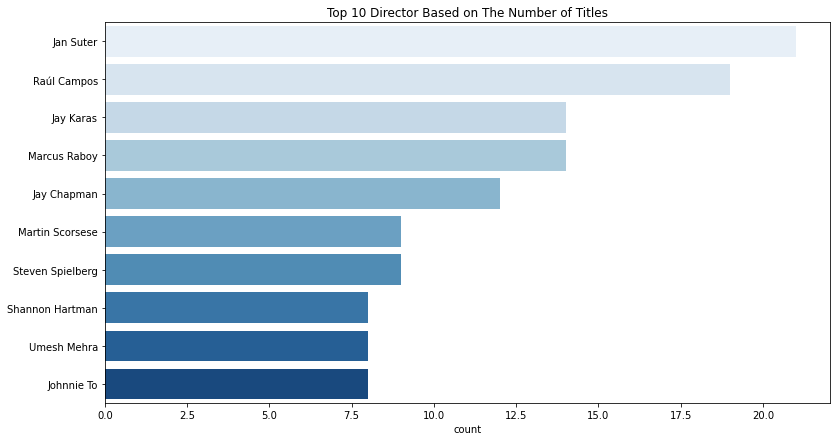

In [46]:
plt.figure(figsize=(13,7))
plt.title('Top 10 Director Based on The Number of Titles')
sns.countplot(y = directors, order = directors.value_counts().index[:10], palette='Blues')
plt.show()

In [47]:
# 13 # Jan Suter and his actors
data_wo_duplicates[data_wo_duplicates['director'].notna() == True].set_index('title')

,type,director,cast,country,date_added,release_year,rating,duration,listed_in,description
title,,,,,,,,,,
Norm of the North: King Sized Adventure,Movie,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
#realityhigh,Movie,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
Automata,Movie,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
Fabrizio Copano: Solo pienso en mi,Movie,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
Good People,Movie,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...
...,...,...,...,...,...,...,...,...,...,...
The Great British Baking Show,TV Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"August 30, 2019",2019,TV-PG,7 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
Miraculous: Tales of Ladybug & Cat Noir,TV Show,Thomas Astruc,"Cristina Vee, Bryce Papenbrook, Keith Silverst...","France, South Korea, Japan","August 2, 2019",2018,TV-Y7,4 Seasons,"Kids' TV, TV Action & Adventure","When Paris is in peril, Marinette becomes Lady..."
Sacred Games,TV Show,"Vikramaditya Motwane, Anurag Kashyap","Saif Ali Khan, Nawazuddin Siddiqui, Radhika Ap...","India, United States","August 15, 2019",2019,TV-MA,2 Seasons,"Crime TV Shows, International TV Shows, TV Dramas",A link in their pasts leads an honest cop to a...


In [48]:
data_wo_duplicates.set_index('title')['director'].head(10)

title
Norm of the North: King Sized Adventure           Richard Finn, Tim Maltby
Jandino: Whatever it Takes                                             NaN
Transformers Prime                                                     NaN
Transformers: Robots in Disguise                                       NaN
#realityhigh                                              Fernando Lebrija
Apaches                                                                NaN
Automata                                                       Gabe Ibáñez
Fabrizio Copano: Solo pienso en mi         Rodrigo Toro, Francisco Schultz
Fire Chasers                                                           NaN
Good People                                              Henrik Ruben Genz
Name: director, dtype: object

In [49]:
series = data_wo_duplicates[data_wo_duplicates['director'].notna() == True]['director']
series

show_id
81145628                Richard Finn, Tim Maltby
80125979                        Fernando Lebrija
70304989                             Gabe Ibáñez
80164077         Rodrigo Toro, Francisco Schultz
70304990                       Henrik Ruben Genz
                            ...                 
80063224                         Andy Devonshire
80164216                           Thomas Astruc
80115328    Vikramaditya Motwane, Anurag Kashyap
80176842                              Jung-ah Im
80126599                               Onur Ünlü
Name: director, Length: 4264, dtype: object

In [50]:
donnees_jan_suter = data_wo_duplicates[data_wo_duplicates['director'].notna() == True][series.str.contains('Jan Suter')]
donnees_jan_suter.set_index('title')

,type,director,cast,country,date_added,release_year,rating,duration,listed_in,description
title,,,,,,,,,,
"El Especial de Alex Fernández, el Especial",Movie,Jan Suter,Alex Fernández,Mexico,"October 13, 2017",2017,TV-MA,52 min,Stand-Up Comedy,"From a Mexico City theme park, energetic stand..."
Carlos Ballarta: El amor es de putos,Movie,"Jan Suter, Raúl Campos Delgado",Carlos Ballarta,Mexico,"November 21, 2016",2016,TV-MA,67 min,Stand-Up Comedy,"Carlos Ballarta mocks daily life in Mexico, in..."
Mea Culpa,Movie,"Raúl Campos, Jan Suter",Alexis de Anda,Mexico,"November 10, 2017",2017,TV-MA,54 min,Stand-Up Comedy,"Raw and outspoken, comedian Alexis de Anda bar..."
Simplemente Manu NNa,Movie,"Jan Suter, Raúl Campos",Manu NNa,Mexico,"May 5, 2017",2017,TV-MA,72 min,Stand-Up Comedy,Eclectic stand-up comic Manu NNa relays everyd...
Fernando Sanjiao: Hombre,Movie,"Raúl Campos, Jan Suter",Fernando Sanjiao,Argentina,"May 25, 2018",2018,TV-MA,63 min,Stand-Up Comedy,Argentine actor and comedian Fernando Sanjiao ...
Carlos Ballarta: Furia Ñera,Movie,"Raúl Campos, Jan Suter",Carlos Ballarta,Mexico,"May 11, 2018",2018,TV-MA,63 min,Stand-Up Comedy,Mexican comic Carlos Ballarta mocks himself an...
Sofía Niño de Rivera: Selección Natural,Movie,"Raúl Campos, Jan Suter",Sofía Niño de Rivera,Mexico,"March 30, 2018",2018,TV-MA,62 min,Stand-Up Comedy,Mexico's Sofía Niño de Rivera brings her dark ...
Malena Pichot: Estupidez compleja,Movie,"Raúl Campos, Jan Suter",Malena Pichot,Argentina,"March 2, 2018",2018,TV-MA,51 min,Stand-Up Comedy,An Argentine comedian espouses the values of f...
Natalia Valdebenito: El especial,Movie,"Raúl Campos, Jan Suter",Natalia Valdebenito,Chile,"March 2, 2018",2018,TV-MA,69 min,Stand-Up Comedy,A Chilean comedian fuses activism with irrever...


In [51]:
donnees_jan_suter_count = pd.Series(", ".join(donnees_jan_suter["cast"].dropna()).split(", "))
donnees_jan_suter_count.value_counts().head(20)

Sofía Niño de Rivera           3
Carlos Ballarta                3
Ricardo O'Farrill              2
Alex Fernández                 1
Sebastián Marcelo Wainraich    1
Alan Saldaña                   1
Marissa "Chabe" Lozano         1
Chumel Torres                  1
Daniel Sosa                    1
Antonio Sanint                 1
Julián Arango                  1
Ricardo Quevedo                1
Raúl Meneses                   1
Coco Celis                     1
Luciano Mellera                1
Jani Dueñas                    1
Natalia Valdebenito            1
Malena Pichot                  1
Fernando Sanjiao               1
Manu NNa                       1
dtype: int64

In [52]:
# 14 # Top ten countries
data.set_index('title').loc[:,'country']

title
Norm of the North: King Sized Adventure        United States, India, South Korea, China
Jandino: Whatever it Takes                                               United Kingdom
Transformers Prime                                                        United States
Transformers: Robots in Disguise                                          United States
#realityhigh                                                              United States
                                                                 ...                   
Red vs. Blue                                                              United States
Maron                                                                     United States
Little Baby Bum: Nursery Rhyme Friends                                              NaN
A Young Doctor's Notebook and Other Stories                              United Kingdom
Friends                                                                   United States
Name: country, Length: 623

In [53]:
data_wo_duplicates.country

show_id
81145628    United States, India, South Korea, China
80117401                              United Kingdom
70234439                               United States
80058654                               United States
80125979                               United States
                              ...                   
80000063                               United States
70286564                               United States
80116008                                         NaN
70281022                              United Kingdom
70153404                               United States
Name: country, Length: 6233, dtype: object

In [54]:
countries = pd.Series(", ".join(data_wo_duplicates["country"].dropna()).split(", "))
#
countries.value_counts().head(10) 

United States     2609
India              837
United Kingdom     601
Canada             318
France             271
Japan              231
Spain              178
South Korea        162
Germany            151
Mexico             129
dtype: int64

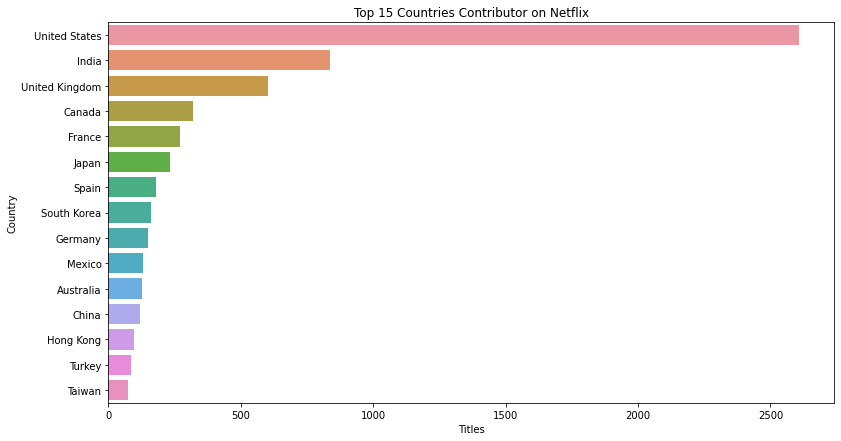

In [55]:
plt.figure(figsize=(13,7))
g = sns.countplot(y = countries, order=countries.value_counts().index[:15])
plt.title('Top 15 Countries Contributor on Netflix')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()

In [56]:
filtered_countries = data_wo_duplicates.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);

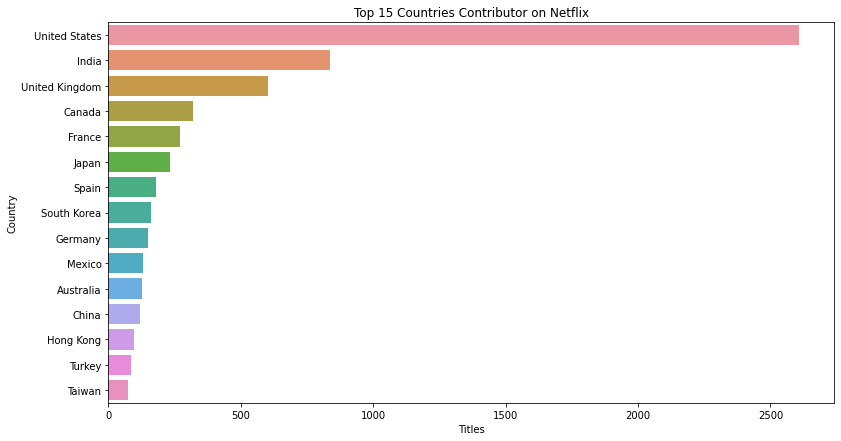

In [57]:
plt.figure(figsize=(13,7))
g = sns.countplot(y = filtered_countries, order=filtered_countries.value_counts().index[:15])
plt.title('Top 15 Countries Contributor on Netflix')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()

In [58]:
# 15 # Number of films per ratings
order = data.rating.unique()
order

array(['TV-PG', 'TV-MA', 'TV-Y7-FV', 'TV-Y7', 'TV-14', 'R', 'TV-Y', 'NR',
       'PG-13', 'TV-G', 'PG', 'G', nan, 'UR', 'NC-17'], dtype=object)

In [59]:
netflix_movies_df = data_wo_duplicates[data_wo_duplicates.type.str.contains("Movie")]
netflix_shows_df = data_wo_duplicates[data_wo_duplicates.type.str.contains("TV Show")]

In [60]:
count_movies = netflix_movies_df.groupby('rating')['title'].count().reset_index()
count_movies

,rating,title
0,G,36
1,NC-17,2
2,NR,202
3,PG,183
4,PG-13,286
5,R,506
6,TV-14,1038
7,TV-G,80
8,TV-MA,1347
9,TV-PG,432


In [61]:
count_shows = netflix_shows_df.groupby('rating')['title'].count().reset_index()
count_shows

,rating,title
0,G,1
1,NR,16
2,PG,1
3,R,2
4,TV-14,660
5,TV-G,69
6,TV-MA,679
7,TV-PG,269
8,TV-Y,102
9,TV-Y7,100


In [62]:
count_shows = count_shows.append([{"rating" : "NC-17", "title" : 0},{"rating" : "PG-13", "title" : 0},{"rating" : "UR", "title" : 0}], ignore_index=True)
count_shows.sort_values(by="rating", ascending=True)

,rating,title
0,G,1
11,NC-17,0
1,NR,16
2,PG,1
12,PG-13,0
3,R,2
4,TV-14,660
5,TV-G,69
6,TV-MA,679
7,TV-PG,269


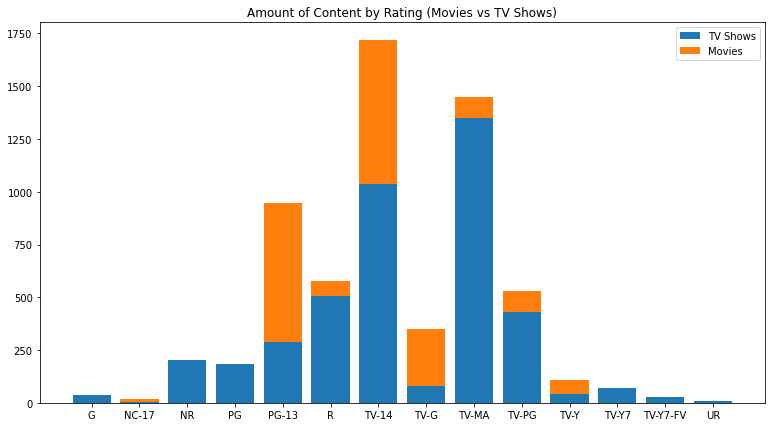

In [63]:
plt.figure(figsize=(13,7))
plt.title('Amount of Content by Rating (Movies vs TV Shows)')
plt.bar(count_movies.rating, count_movies.title)
plt.bar(count_movies.rating, count_shows.title, bottom=count_movies.title)
plt.legend(['TV Shows', 'Movies'])
plt.show()

In [64]:
# 16 # Evolution of number of movies / TV show along the time
data.year_added = pd.DatetimeIndex(data.date_added).year
netflix_movies_df.year_added = pd.DatetimeIndex(netflix_movies_df.date_added).year
netflix_shows_df.year_added = pd.DatetimeIndex(netflix_shows_df.date_added).year

C:\Users\phili\AppData\Local\Temp/ipykernel_23448/2513944571.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.year_added = pd.DatetimeIndex(data.date_added).year
C:\Users\phili\AppData\Local\Temp/ipykernel_23448/2513944571.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  netflix_movies_df.year_added = pd.DatetimeIndex(netflix_movies_df.date_added).year
C:\Users\phili\AppData\Local\Temp/ipykernel_23448/2513944571.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  netflix_shows_df.year_added = pd.DatetimeIndex(netflix_shows_df.date_added).year


In [65]:
netflix_year_df = data.year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"})
movies_year_df = netflix_movies_df.year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"})
shows_year_df = netflix_shows_df.year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"})

In [66]:
netflix_year_df = netflix_year_df[netflix_year_df.year != 2020]
movies_year_df = movies_year_df[movies_year_df != 2020]
shows_year_df = shows_year_df[shows_year_df != 2020]

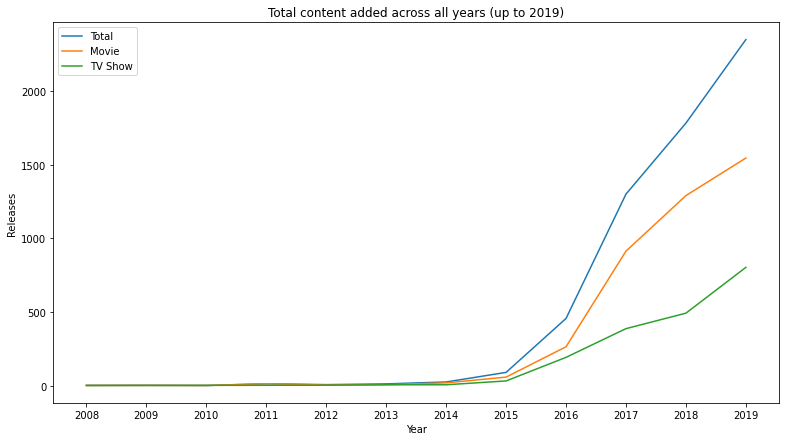

In [67]:
fig, ax = plt.subplots(figsize=(13, 7))
sns.lineplot(data=netflix_year_df, x='year', y='date_added')
sns.lineplot(data=movies_year_df, x='year', y='date_added')
sns.lineplot(data=shows_year_df, x='year', y='date_added')
ax.set_xticks(np.arange(2008, 2020, 1))
plt.title('Total content added across all years (up to 2019)')
plt.legend(['Total','Movie','TV Show'])
plt.ylabel('Releases')
plt.xlabel('Year')
plt.show()

In [68]:
# 17 # Movies duration distribution
data.set_index('title').loc[:,'duration']

title
Norm of the North: King Sized Adventure            90 min
Jandino: Whatever it Takes                         94 min
Transformers Prime                               1 Season
Transformers: Robots in Disguise                 1 Season
#realityhigh                                       99 min
                                                  ...    
Red vs. Blue                                   13 Seasons
Maron                                           4 Seasons
Little Baby Bum: Nursery Rhyme Friends             60 min
A Young Doctor's Notebook and Other Stories     2 Seasons
Friends                                        10 Seasons
Name: duration, Length: 6234, dtype: object

In [69]:
data_Movie['Durée'] = data_Movie['duration']
data_Movie.set_index('title')

C:\Users\phili\AppData\Local\Temp/ipykernel_23448/1543076069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_Movie['Durée'] = data_Movie['duration']


,type,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Durée
title,,,,,,,,,,,
Norm of the North: King Sized Adventure,Movie,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,90 min
Jandino: Whatever it Takes,Movie,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,94 min
#realityhigh,Movie,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,99 min
Automata,Movie,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f...",110 min
Fabrizio Copano: Solo pienso en mi,Movie,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...,60 min
...,...,...,...,...,...,...,...,...,...,...,...
Frank and Cindy,Movie,G.J. Echternkamp,NaN,United States,"April 1, 2016",2007,TV-MA,70 min,Documentaries,Frank was a rising pop star when he married Ci...,70 min
Frank and Cindy,Movie,G.J. Echternkamp,"Rene Russo, Oliver Platt, Johnny Simmons, Jane...",United States,"April 1, 2016",2015,R,102 min,"Comedies, Dramas, Independent Movies",A student filmmaker vengefully turns his camer...,102 min
Iverson,Movie,Zatella Beatty,Allen Iverson,United States,"April 1, 2016",2014,NR,88 min,"Documentaries, Sports Movies",This unfiltered documentary follows the rocky ...,88 min


In [70]:
hist_duree = data_Movie['Durée'].str.replace(" min","").astype(int).sort_values(ascending=False)
hist_duree

show_id
80988062    312
60002818    228
60020906    224
70090035    214
80175798    209
           ... 
80239831     12
80114804     12
81020543     11
81176188     10
70304298      3
Name: Durée, Length: 4265, dtype: int32

C:\Users\phili\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


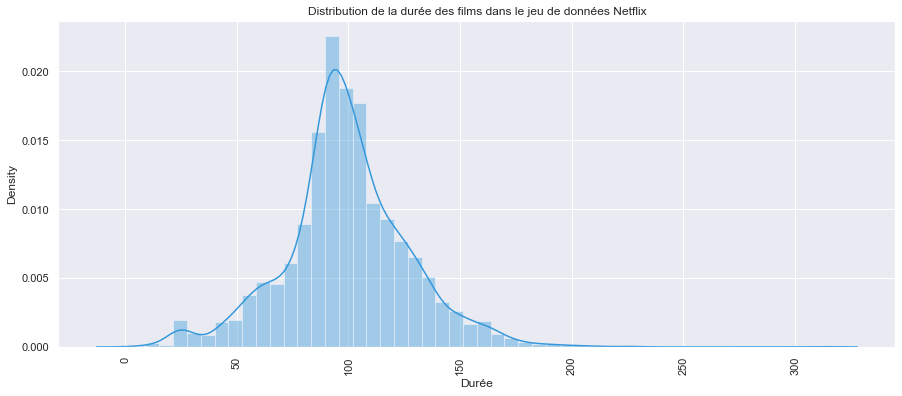

In [172]:
palette= sns.color_palette(["#3498db","#e74c3c"])
sns.set_palette(palette)
plt.figure(figsize=[15,6])
plt.subplot(111)
sns.distplot(hist_duree)
plt.title("Distribution de la durée des films dans le jeu de données Netflix")
plt.xticks(rotation=90)
plt.show()

In [139]:
# 18 # Tracer un graphique représentant le nombre de séries par modalité de nombre de saisons
data_TVShow

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
80117902,TV Show,Fire Chasers,NaN,NaN,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
80244601,TV Show,Castle of Stars,NaN,"Chaiyapol Pupart, Jintanutda Lummakanon, Worra...",NaN,"September 7, 2018",2015,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",As four couples with different lifestyles go t...
...,...,...,...,...,...,...,...,...,...,...,...
80159925,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."


In [144]:
data_TVShow.set_index('title')['duration'].str.replace(" Seasons","").str.replace(" Season","").sort_values(ascending=True)

title
Transformers Prime                                  1
Prohibition: A Film by Ken Burns and Lynn Novick    1
Ken Burns: The Roosevelts: An Intimate History      1
Ken Burns: The Civil War                            1
Hitler's Circle of Evil                             1
                                                   ..
The Office (U.S.)                                   9
The Walking Dead                                    9
Shameless (U.S.)                                    9
Club Friday The Series 6                            9
LEGO Ninjago: Masters of Spinjitzu                  9
Name: duration, Length: 1969, dtype: object

In [105]:
count_season = data_TVShow.set_index('title')['duration']
count_season

title
Transformers Prime                               1 Season
Transformers: Robots in Disguise                 1 Season
Apaches                                          1 Season
Fire Chasers                                     1 Season
Castle of Stars                                  1 Season
                                                  ...    
Kikoriki                                        2 Seasons
Red vs. Blue                                   13 Seasons
Maron                                           4 Seasons
A Young Doctor's Notebook and Other Stories     2 Seasons
Friends                                        10 Seasons
Name: duration, Length: 1969, dtype: object

In [162]:
count_season = data_TVShow.set_index('title')['duration'].str.replace(" Seasons","").str.replace("Season","").astype('int').sort_values(ascending=True)
count_season.dtype

dtype('int32')

In [ ]:
coun

In [163]:
count_season.value_counts()

1     1321
2      304
3      158
4       61
5       46
6       22
7       21
8       16
9        7
10       3
11       3
12       2
13       2
15       2
14       1
Name: duration, dtype: int64

Text(0.5, 0, 'Quantity')

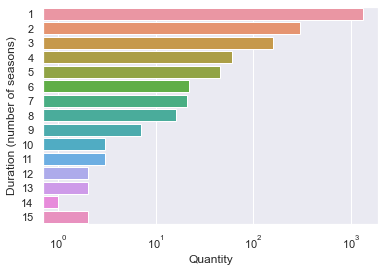

In [165]:
sns.set_theme(style="darkgrid")
sns.countplot(data = pd.DataFrame(count_season),y='duration', order = np.arange(1, 16, 1),log=True)
plt.ylabel('Duration (number of seasons)')
plt.xlabel('Quantity')


<AxesSubplot:xlabel='count', ylabel='duration'>

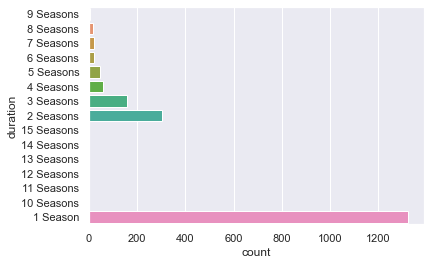

In [166]:
sns.set_theme(style="darkgrid")

sns.countplot(data = pd.DataFrame(count_season2),y='duration')